In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the csv file
df = pd.read_csv("Sample_for_AI (1) (1) (1) (1) (1) (1) (2) (1) (1) (1).csv")

In [3]:
df

,ID,Purchased,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
0,1,No,No,No,0.0,0,0.00,NaN,API
1,2,No,No,No,5.0,674,2.50,NaN,API
2,3,Yes,No,No,2.0,1532,2.00,Business Administration,Landing Page Submission
3,4,No,No,No,1.0,305,1.00,Media and Advertising,Landing Page Submission
4,5,Yes,No,No,2.0,1428,1.00,NaN,Landing Page Submission
...,...,...,...,...,...,...,...,...,...
9235,9236,Yes,Yes,No,8.0,1845,2.67,IT Projects Management,Landing Page Submission
9236,9237,No,No,No,2.0,238,2.00,Media and Advertising,Landing Page Submission
9237,9238,No,Yes,No,2.0,199,2.00,Business Administration,Landing Page Submission
9238,9239,Yes,No,No,3.0,499,3.00,Human Resource Management,Landing Page Submission


In [4]:
# We don't need the ID column so we will drop it. 
df.drop('ID',axis = 1, inplace = True)

In [5]:
df.sample(10)

,Purchased,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
5484,No,Yes,No,1.0,832,1.0,IT Projects Management,Landing Page Submission
1576,No,No,No,6.0,1178,3.0,NaN,API
3376,Yes,No,No,18.0,976,3.0,"Banking, Investment And Insurance",Landing Page Submission
6661,No,No,No,0.0,0,0.0,NaN,API
2629,Yes,No,No,0.0,0,0.0,Human Resource Management,Lead Add Form
876,Yes,No,No,0.0,0,0.0,NaN,API
2760,Yes,No,No,2.0,1241,1.0,NaN,API
7229,Yes,No,No,4.0,1216,4.0,Operations Management,Landing Page Submission
3255,No,No,No,1.0,153,1.0,NaN,API
6694,No,No,No,1.0,101,1.0,Supply Chain Management,API


In [6]:
df.shape

(9240, 8)

In [7]:
# Dataset contains 9240 records and 8 features where Purchased is our target variable

In [8]:
# Let's See the null values
df.isnull().sum()

Purchased                         0
Do Not Email                      0
Do Not Call                       0
TotalVisits                     137
Total Time Spent on Website       0
Page Views Per Visit            137
Specialization                 3380
Origin                            0
dtype: int64

In [9]:
# Let's check the duplicate values 
df.duplicated().sum()

2219

In [10]:
df.isin([' ','NA','-','?']).sum()

Purchased                      0
Do Not Email                   0
Do Not Call                    0
TotalVisits                    0
Total Time Spent on Website    0
Page Views Per Visit           0
Specialization                 0
Origin                         0
dtype: int64

In [11]:
#Dataset has 2219 duplicate values we need to drop them 
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(7021, 8)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Purchased                    7021 non-null   object 
 1   Do Not Email                 7021 non-null   object 
 2   Do Not Call                  7021 non-null   object 
 3   TotalVisits                  6885 non-null   float64
 4   Total Time Spent on Website  7021 non-null   int64  
 5   Page Views Per Visit         6885 non-null   float64
 6   Specialization               5416 non-null   object 
 7   Origin                       7021 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 493.7+ KB


In [14]:
df.columns

Index(['Purchased', 'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'Origin'],
      dtype='object')

In [15]:
#Purchased Column
df['Purchased'].value_counts()

Purchased
No     4333
Yes    2688
Name: count, dtype: int64

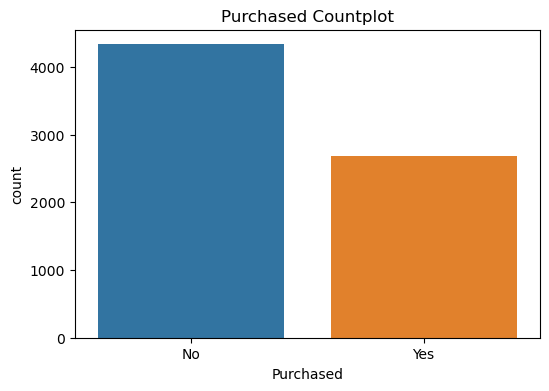

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Purchased"], hue =df['Purchased'] )
plt.title("Purchased Countplot")
plt.show()

In [17]:
df["Do Not Email"].value_counts()

Do Not Email
No     6395
Yes     626
Name: count, dtype: int64

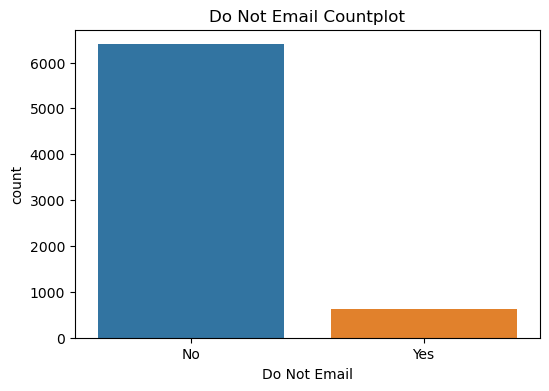

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Do Not Email"], hue =df["Do Not Email"], stat = 'count' )
plt.title("Do Not Email Countplot")
plt.show()

In [19]:
df["Do Not Call"].value_counts()

Do Not Call
No     7019
Yes       2
Name: count, dtype: int64

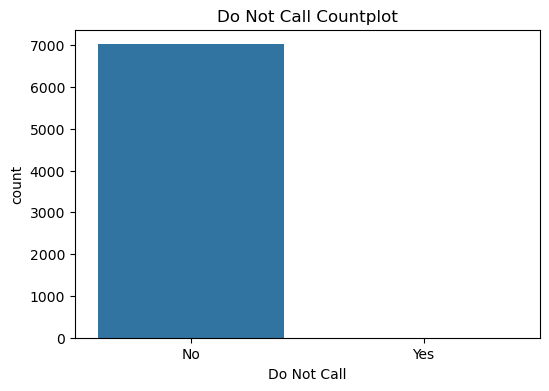

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Do Not Call"], hue =df["Do Not Call"], stat = 'count' )
plt.title("Do Not Call Countplot")
plt.show()

In [21]:
df['TotalVisits'].nunique()

41

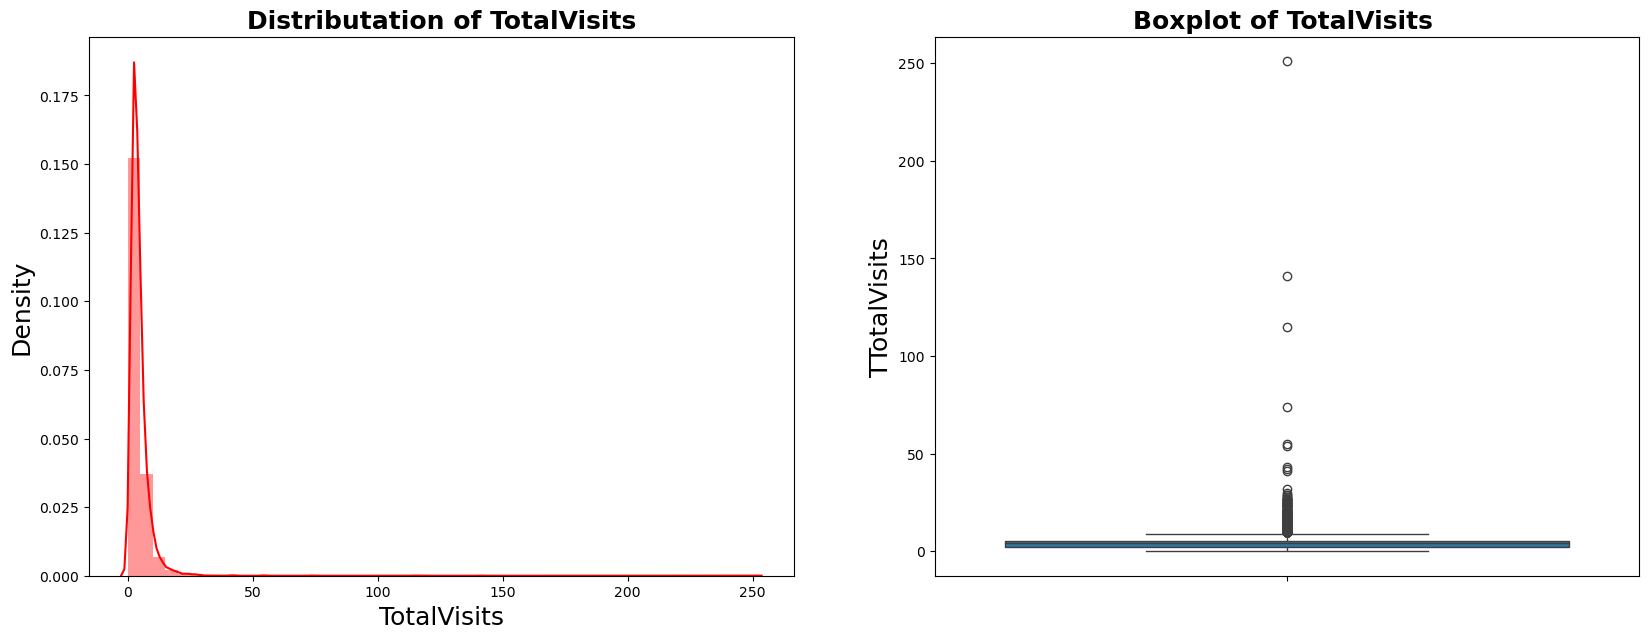

In [22]:
# Distributation of the Totalvisits Column
plt.figure(figsize = (20,7))
plt.subplot(121)
sns.distplot(df['TotalVisits'],color = 'r')
plt.title("Distributation of TotalVisits",fontsize =18, fontweight = 'bold')
plt.xlabel('TotalVisits',fontsize = 18)
plt.ylabel('Density',fontsize = 18)

plt.subplot(122)
sns.boxplot(df['TotalVisits'])
plt.title("Boxplot of TotalVisits ", fontsize =18, fontweight = 'bold')
plt.ylabel('TTotalVisits',fontsize = 18)
plt.show()

In [23]:
df['Total Time Spent on Website'].nunique()

1731

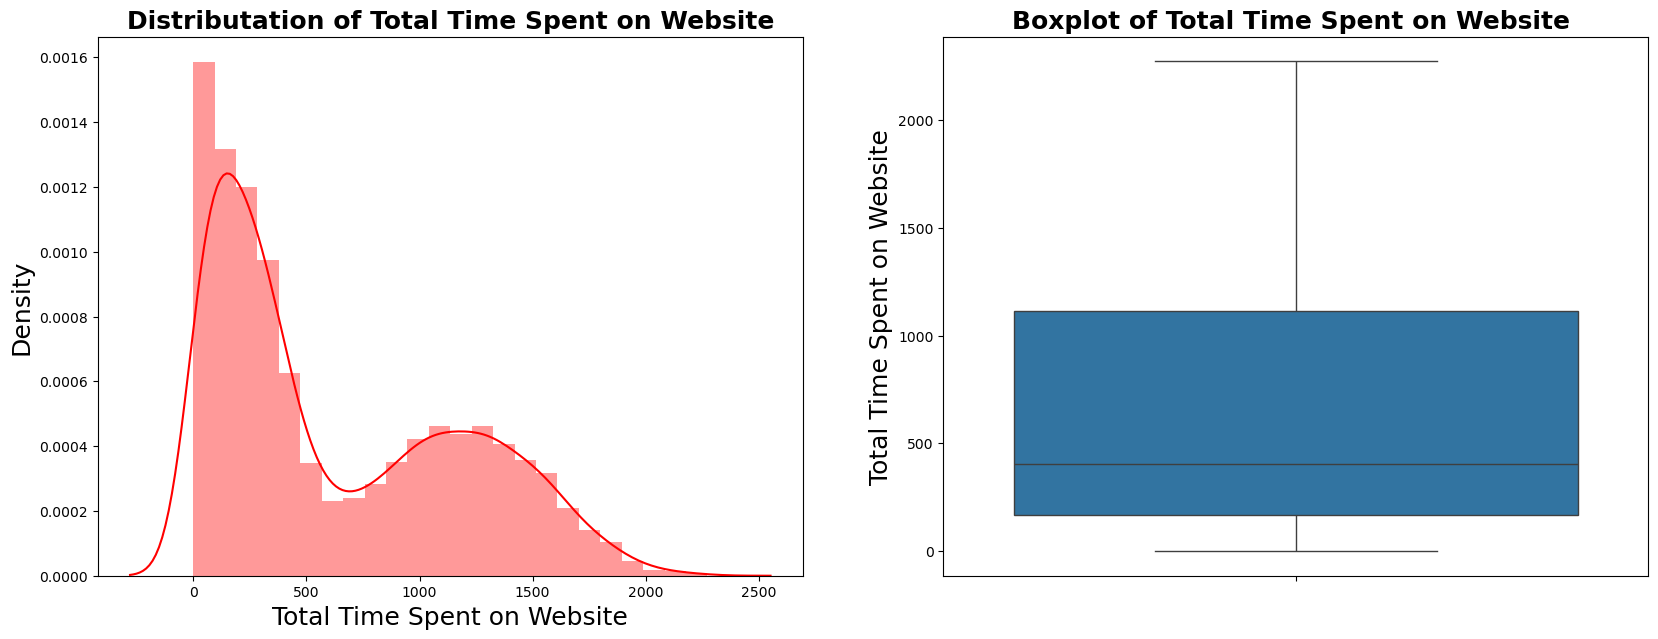

In [24]:
# Distributation of the Total Time Spend On Website
plt.figure(figsize = (20,7))
plt.subplot(121)
sns.distplot(df['Total Time Spent on Website'],color='r')
plt.title("Distributation of Total Time Spent on Website",fontsize =18, fontweight = 'bold')
plt.xlabel('Total Time Spent on Website',fontsize = 18)
plt.ylabel('Density',fontsize = 18)

plt.subplot(122)
sns.boxplot(df['Total Time Spent on Website'])
plt.title("Boxplot of Total Time Spent on Website ", fontsize =18, fontweight = 'bold')
plt.ylabel('Total Time Spent on Website',fontsize = 18)
plt.show()

In [25]:
df['Page Views Per Visit'].nunique()

114

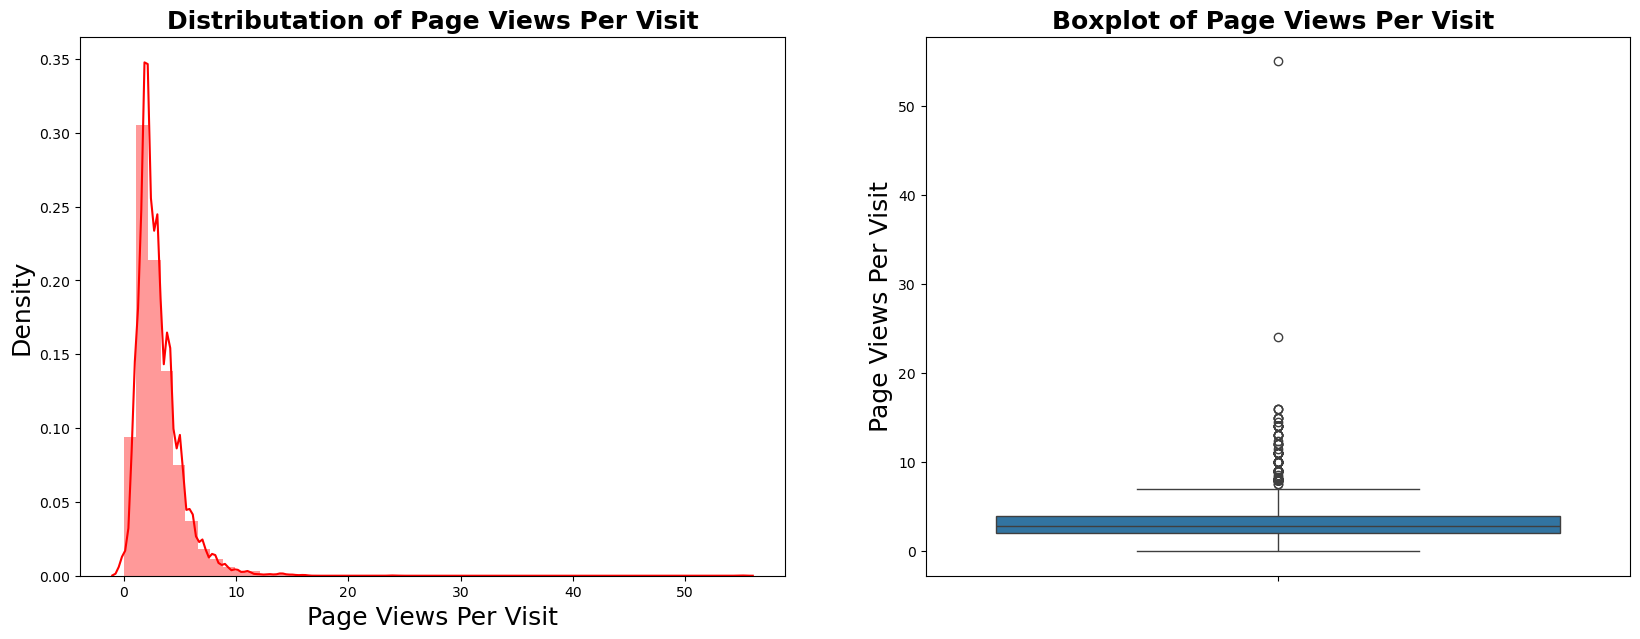

In [26]:
# Distributation of the Page Views Per Visit
plt.figure(figsize = (20,7))
plt.subplot(121)
sns.distplot(df['Page Views Per Visit'],color='r')
plt.title("Distributation of Page Views Per Visit",fontsize =18, fontweight = 'bold')
plt.xlabel('Page Views Per Visit',fontsize = 18)
plt.ylabel('Density',fontsize = 18)

plt.subplot(122)
sns.boxplot(df['Page Views Per Visit'])
plt.title("Boxplot of Page Views Per Visit ", fontsize =18, fontweight = 'bold')
plt.ylabel('Page Views Per Visit',fontsize = 18)
plt.show()

In [27]:
df['Specialization'].unique()                          # This feature has total 18 unique values with nan values

array([nan, 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [28]:
df['Specialization'].isnull().sum()

1605

In [29]:
df['Specialization'].value_counts()

Specialization
Finance Management                   890
Human Resource Management            758
Marketing Management                 732
Operations Management                467
Business Administration              375
IT Projects Management               357
Supply Chain Management              331
Banking, Investment And Insurance    306
Travel and Tourism                   200
Media and Advertising                198
International Business               174
Healthcare Management                144
E-COMMERCE                           110
Hospitality Management               107
Retail Management                    100
Rural and Agribusiness                70
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

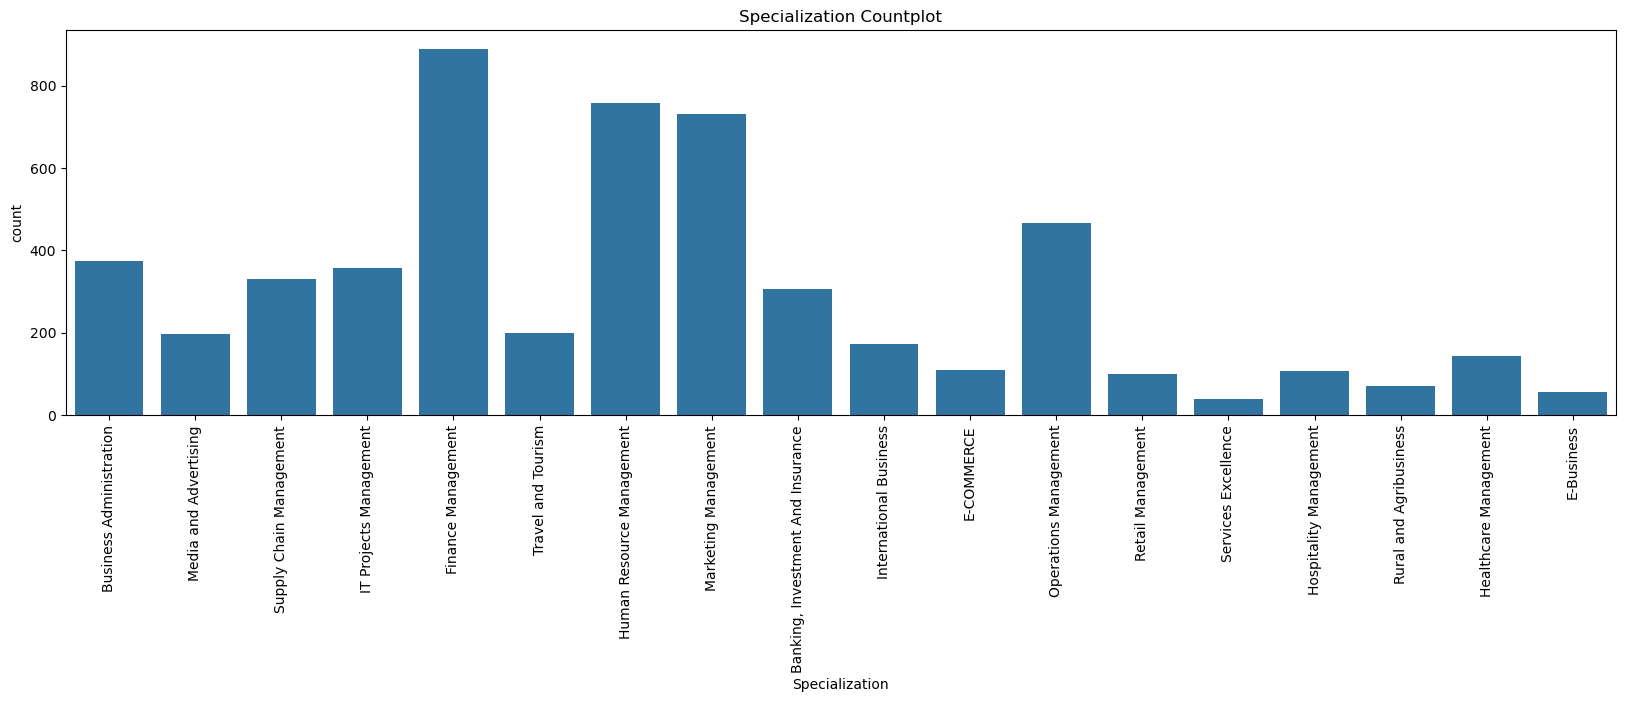

In [30]:
plt.figure(figsize=(20, 5))
sns.countplot(x="Specialization",data  = df )
plt.title("Specialization Countplot")
plt.xticks(rotation = 90)
plt.show()

In [31]:
df['Origin'].value_counts()

Origin
Landing Page Submission    4845
API                        1944
Lead Add Form               195
Lead Import                  36
Quick Add Form                1
Name: count, dtype: int64

In [32]:
#There is only one value with Quick Add Form let's see that record
df[df['Origin'] == 'Quick Add Form']

,Purchased,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
2601,Yes,Yes,No,NaN,2217,NaN,E-COMMERCE,Quick Add Form


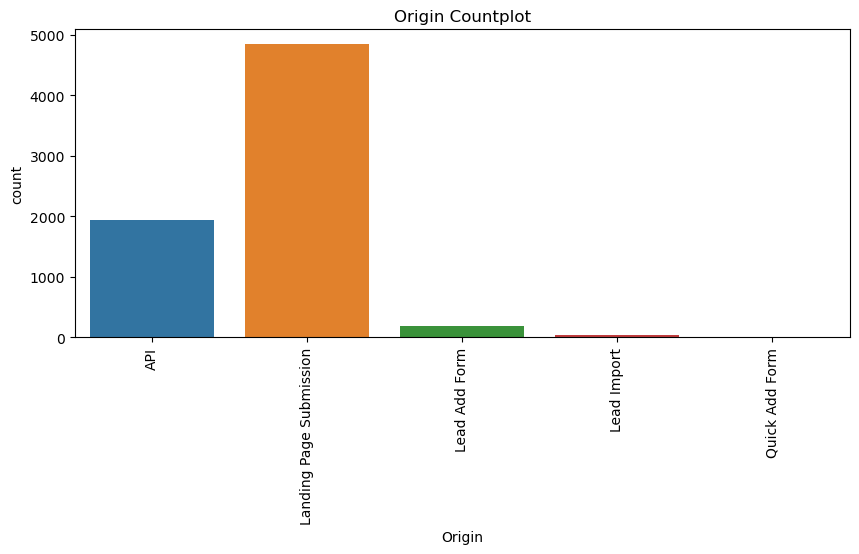

In [33]:
plt.figure(figsize=(10, 4))
sns.countplot(x="Origin", hue ="Origin" ,data  = df )
plt.title("Origin Countplot")
plt.xticks(rotation = 90)
plt.show()

## Observations :
* Dataset contains 9240 records and 8 features where Purchased is our target variable
* The 3 features 'TotalVisits','Total Time Spent on Website' and 'Page Views Per Visit' are in numerical datatypes('int' and 'float')
* The feature 'Page Views Per Visit', 'Specialization' and 'TotalVisits' has null values
* After Removing the duplicate values the shape of the dataset is 7021 columns  and 8 features
* The features do not call has very less yes values  and do not email has almost all no values
* The features "Totalvisite" and "Page Views Per Visit" has right skewed data and also contains the outliers
* The feature "Total Time Spent on Website" has only right skewed data
* The Origin Feature has only 1 record of "Quick Add Form

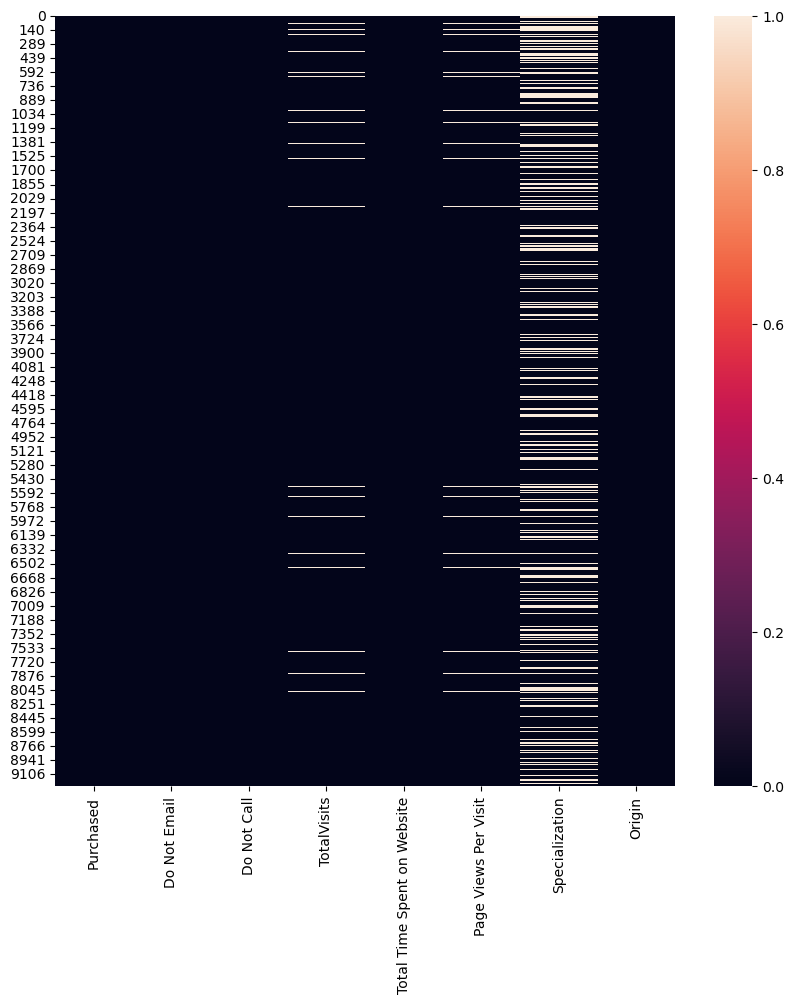

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())
plt.show()

In [35]:
#Handling null values
df.isnull().sum()

Purchased                         0
Do Not Email                      0
Do Not Call                       0
TotalVisits                     136
Total Time Spent on Website       0
Page Views Per Visit            136
Specialization                 1605
Origin                            0
dtype: int64

In [36]:
# Since the columns has so many outliers and the mean is very sensitive to the outliers we replace the nulls with median value 
df["TotalVisits"].median()

4.0

In [37]:
df["TotalVisits"].fillna(df["TotalVisits"].median() , inplace=True )

In [38]:
df["Page Views Per Visit"].median()

2.8

In [39]:
df["Page Views Per Visit"].fillna(df["Page Views Per Visit"].median(), inplace = True )

In [40]:
df.isnull().sum()

Purchased                         0
Do Not Email                      0
Do Not Call                       0
TotalVisits                       0
Total Time Spent on Website       0
Page Views Per Visit              0
Specialization                 1605
Origin                            0
dtype: int64

In [41]:
df['Specialization'].mode()[0]

'Finance Management'

In [42]:
df['Specialization'].fillna(df['Specialization'].mode()[0],inplace = True)

In [43]:
df.isnull().sum()

Purchased                      0
Do Not Email                   0
Do Not Call                    0
TotalVisits                    0
Total Time Spent on Website    0
Page Views Per Visit           0
Specialization                 0
Origin                         0
dtype: int64

In [44]:
## Handling Outliers Using IQR
# Columns : TotalVisites, Page Views Per Visit
#since our data is not normarlly distributated we cannot apply zscore so we will go with IQR to remove outliers

In [45]:
df.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,7021.000000,7021.000000,7021.000000
mean,4.505911,636.954422,3.081263
std,5.083673,546.685212,1.961813
min,0.000000,0.000000,0.000000
25%,2.000000,169.000000,2.000000
50%,4.000000,403.000000,2.800000
75%,5.000000,1113.000000,4.000000
max,251.000000,2272.000000,55.000000


In [46]:
totalvisits_25_per = df['TotalVisits'].quantile(.25)
totalvisits_25_per

2.0

In [47]:
totalvisits_75_per = df['TotalVisits'].quantile(.75)
totalvisits_75_per

5.0

In [48]:
IQR = totalvisits_75_per - totalvisits_25_per
IQR

3.0

In [49]:
upper_limit_totalvisit = totalvisits_75_per+1.5*IQR
lower_limit_totalvisit = totalvisits_25_per-1.5*IQR

In [50]:
print('Upper Limit = ', upper_limit_totalvisit )
print('Lower Limit = ',lower_limit_totalvisit)

Upper Limit =  9.5
Lower Limit =  -2.5


In [51]:
#Let's cap the data
new_df_cap = df.copy()

In [52]:
new_df_cap['TotalVisits'] = np.where(
new_df_cap['TotalVisits']>upper_limit_totalvisit, upper_limit_totalvisit,
np.where(
new_df_cap["TotalVisits"]<lower_limit_totalvisit,
lower_limit_totalvisit,
new_df_cap['TotalVisits']
)
)

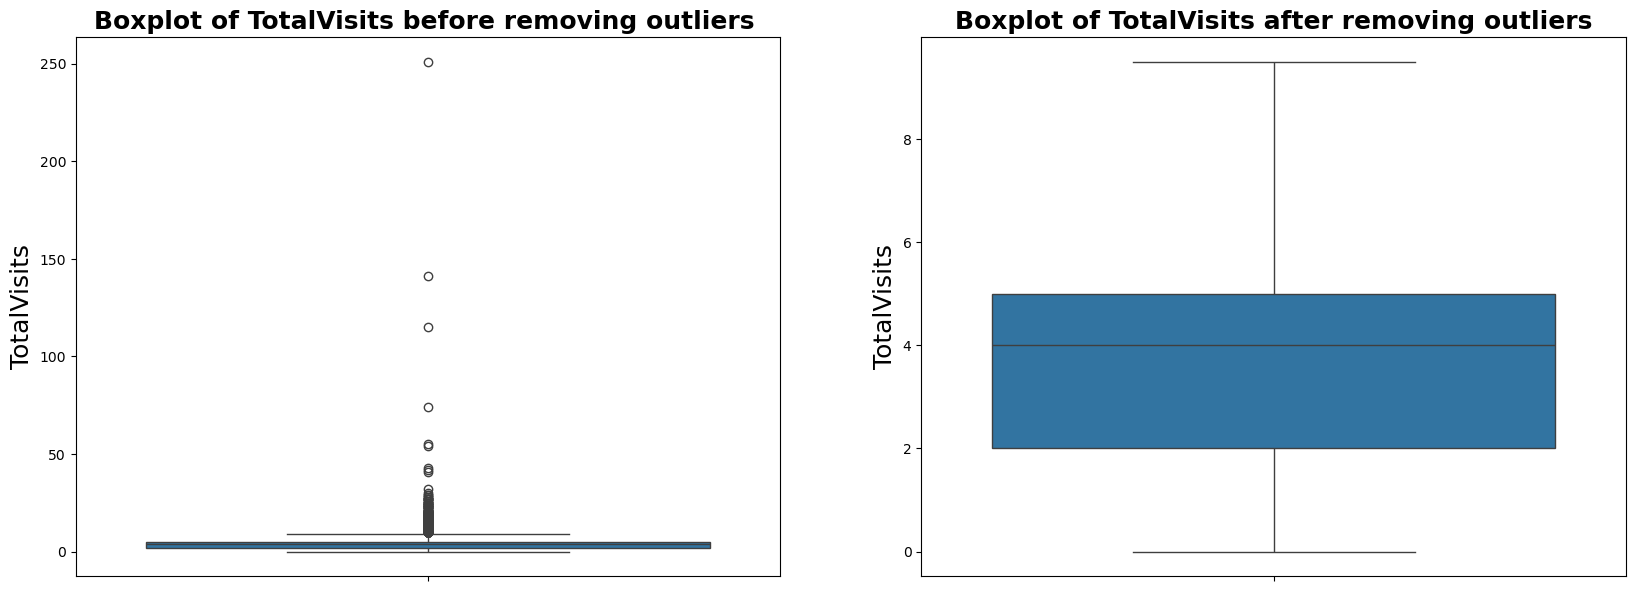

In [53]:
plt.figure(figsize = (20,7))
plt.subplot(121)
sns.boxplot(df['TotalVisits'])
plt.title("Boxplot of TotalVisits before removing outliers ", fontsize =18, fontweight = 'bold')
plt.ylabel('TotalVisits',fontsize = 18)

plt.subplot(122)
sns.boxplot(new_df_cap['TotalVisits'])
plt.title("Boxplot of TotalVisits after removing outliers", fontsize =18, fontweight = 'bold')
plt.ylabel('TotalVisits',fontsize = 18)
plt.show()

In [54]:
# Removing Outliers Page Views Per Visit features
pvpv_25_per = df['Page Views Per Visit'].quantile(.25)
pvpv_25_per

2.0

In [55]:
pvpv_75_per = df['Page Views Per Visit'].quantile(.75)
pvpv_75_per

4.0

In [56]:
IQR1 = pvpv_75_per -pvpv_25_per
IQR1

2.0

In [57]:
upper_limit = pvpv_75_per+1.5*IQR1
lower_limit = pvpv_25_per-1.5*IQR1

In [58]:
print('upper limit = ',upper_limit)
print('lower limit =',lower_limit)

upper limit =  7.0
lower limit = -1.0


In [59]:
new_df_cap['Page Views Per Visit'] = np.where(
new_df_cap['Page Views Per Visit']>upper_limit, upper_limit,
np.where(
new_df_cap["Page Views Per Visit"]<lower_limit,
lower_limit,
new_df_cap['Page Views Per Visit']
)
)

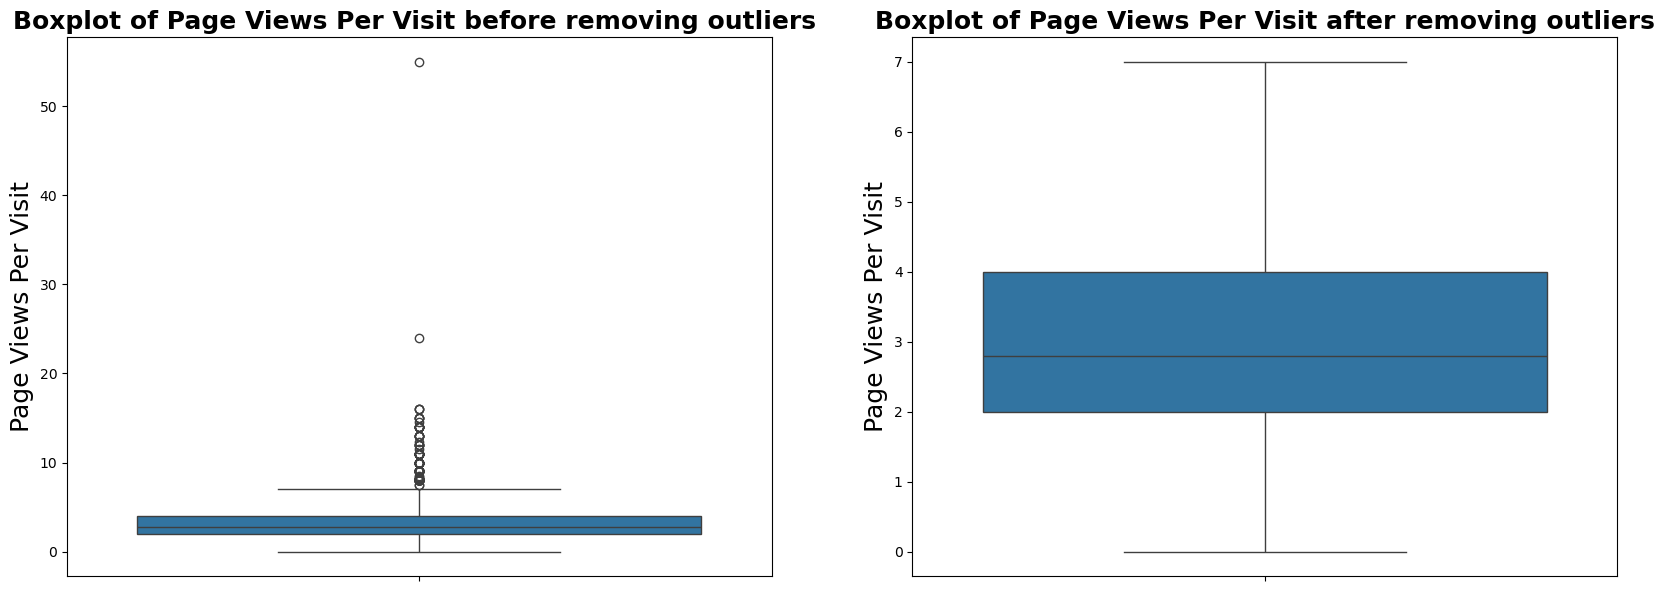

In [60]:
plt.figure(figsize = (20,7))
plt.subplot(121)
sns.boxplot(df['Page Views Per Visit'])
plt.title("Boxplot of Page Views Per Visit before removing outliers ", fontsize =18, fontweight = 'bold')
plt.ylabel('Page Views Per Visit',fontsize = 18)

plt.subplot(122)
sns.boxplot(new_df_cap['Page Views Per Visit'])
plt.title("Boxplot of Page Views Per Visit after removing outliers", fontsize =18, fontweight = 'bold')
plt.ylabel('Page Views Per Visit',fontsize = 18)
plt.show()

In [61]:
df1 = new_df_cap.copy()

In [62]:
df1.head()

,Purchased,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
0,No,No,No,0.0,0,0.0,Finance Management,API
1,No,No,No,5.0,674,2.5,Finance Management,API
2,Yes,No,No,2.0,1532,2.0,Business Administration,Landing Page Submission
3,No,No,No,1.0,305,1.0,Media and Advertising,Landing Page Submission
4,Yes,No,No,2.0,1428,1.0,Finance Management,Landing Page Submission


In [63]:
df1['TotalVisits'].unique()

array([0. , 5. , 2. , 1. , 4. , 8. , 9.5, 6. , 3. , 7. , 9. ])

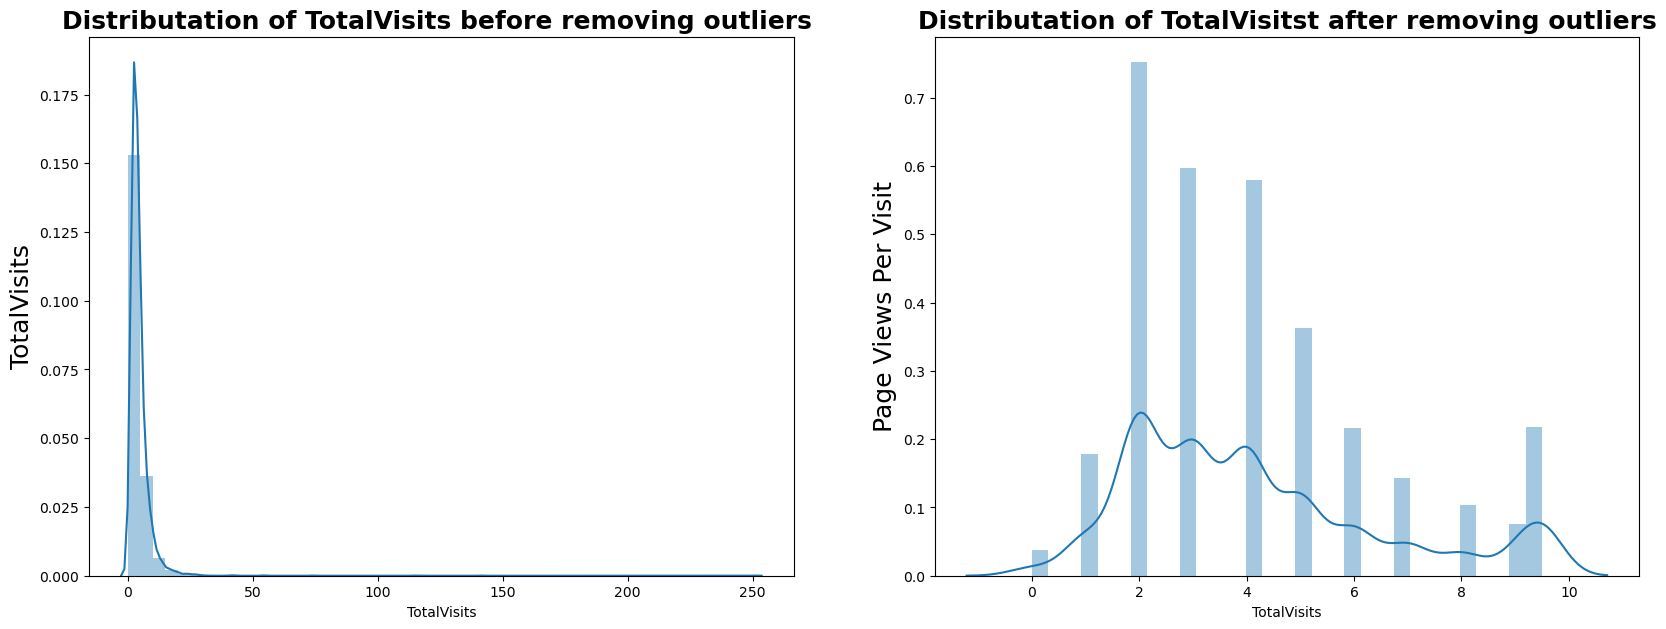

In [64]:
plt.figure(figsize = (20,7))
plt.subplot(121)
sns.distplot(df['TotalVisits'])
plt.title("Distributation of TotalVisits before removing outliers ", fontsize =18, fontweight = 'bold')
plt.ylabel('TotalVisits',fontsize = 18)

plt.subplot(122)
sns.distplot(df1['TotalVisits'])
plt.title("Distributation of TotalVisitst after removing outliers", fontsize =18, fontweight = 'bold')
plt.ylabel('Page Views Per Visit',fontsize = 18)
plt.show()

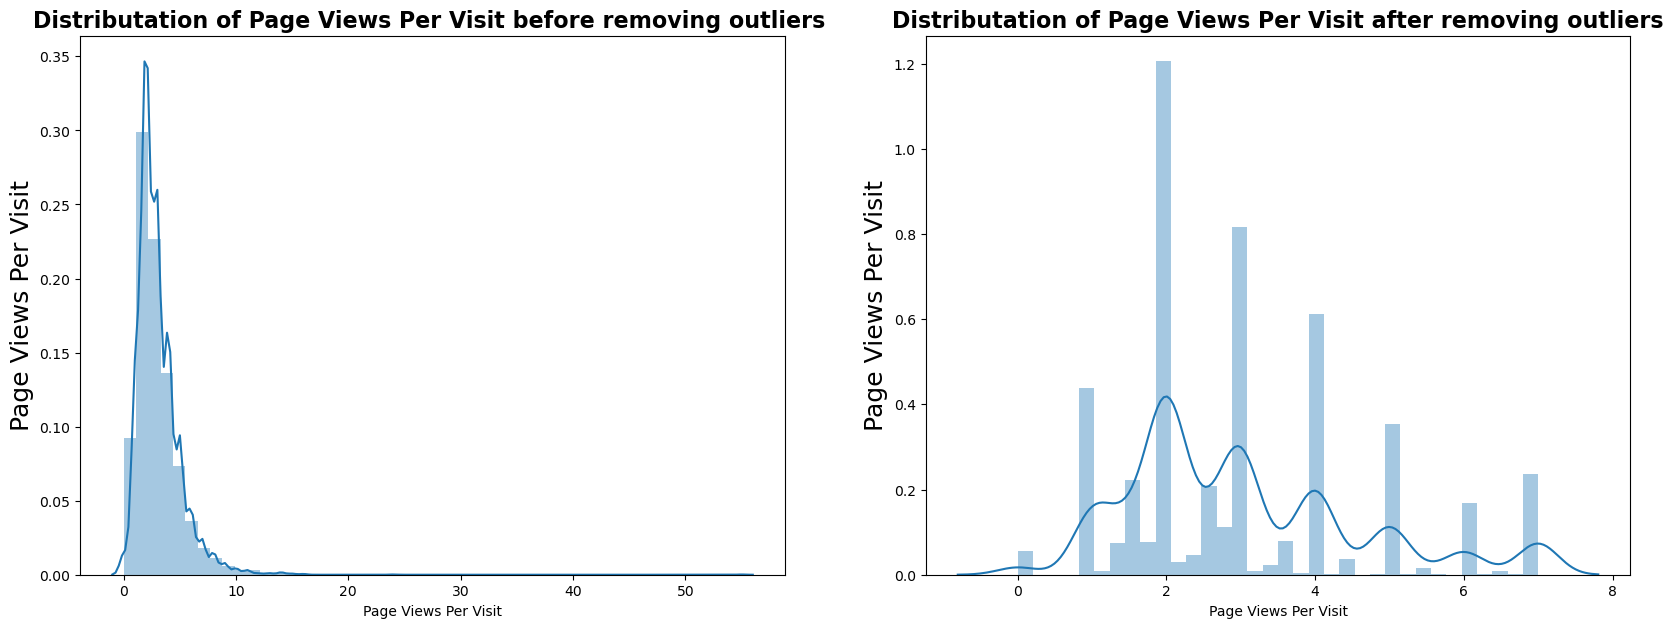

In [65]:
plt.figure(figsize = (20,7))
plt.subplot(121)
sns.distplot(df['Page Views Per Visit'])
plt.title("Distributation of Page Views Per Visit before removing outliers ", fontsize =16, fontweight = 'bold')
plt.ylabel('Page Views Per Visit',fontsize = 18)

plt.subplot(122)
sns.distplot(df1['Page Views Per Visit'])
plt.title("Distributation of Page Views Per Visit after removing outliers", fontsize =16, fontweight = 'bold')
plt.ylabel('Page Views Per Visit',fontsize = 18)
plt.show()

In [66]:
df1

,Purchased,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
0,No,No,No,0.0,0,0.00,Finance Management,API
1,No,No,No,5.0,674,2.50,Finance Management,API
2,Yes,No,No,2.0,1532,2.00,Business Administration,Landing Page Submission
3,No,No,No,1.0,305,1.00,Media and Advertising,Landing Page Submission
4,Yes,No,No,2.0,1428,1.00,Finance Management,Landing Page Submission
...,...,...,...,...,...,...,...,...
9235,Yes,Yes,No,8.0,1845,2.67,IT Projects Management,Landing Page Submission
9236,No,No,No,2.0,238,2.00,Media and Advertising,Landing Page Submission
9237,No,Yes,No,2.0,199,2.00,Business Administration,Landing Page Submission
9238,Yes,No,No,3.0,499,3.00,Human Resource Management,Landing Page Submission


In [156]:
df1['Purchased'].replace({'No':0, 'Yes':1}, inplace = True)
df1

,Purchased,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
0,0,No,No,0.0,0,0.00,Finance Management,API
1,0,No,No,5.0,674,2.50,Finance Management,API
2,1,No,No,2.0,1532,2.00,Business Administration,Landing Page Submission
3,0,No,No,1.0,305,1.00,Media and Advertising,Landing Page Submission
4,1,No,No,2.0,1428,1.00,Finance Management,Landing Page Submission
...,...,...,...,...,...,...,...,...
9235,1,Yes,No,8.0,1845,2.67,IT Projects Management,Landing Page Submission
9236,0,No,No,2.0,238,2.00,Media and Advertising,Landing Page Submission
9237,0,Yes,No,2.0,199,2.00,Business Administration,Landing Page Submission
9238,1,No,No,3.0,499,3.00,Human Resource Management,Landing Page Submission


In [157]:
df1['Specialization'].nunique()

18

In [158]:
df1['Specialization'].value_counts()

Specialization
Finance Management                   2495
Human Resource Management             758
Marketing Management                  732
Operations Management                 467
Business Administration               375
IT Projects Management                357
Supply Chain Management               331
Banking, Investment And Insurance     306
Travel and Tourism                    200
Media and Advertising                 198
International Business                174
Healthcare Management                 144
E-COMMERCE                            110
Hospitality Management                107
Retail Management                     100
Rural and Agribusiness                 70
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [159]:
#Now lets transform the data and train the model
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score

In [160]:
x=df1.drop(['Purchased'], axis=1 )
y= df1['Purchased']

In [161]:
x.shape

(7021, 7)

In [162]:
y.shape

(7021,)

In [163]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.33, random_state=42)

In [164]:
print(x_train.shape,y_train.shape)

(4704, 7) (4704,)


In [165]:
print(x_test.shape,y_test.shape)

(2317, 7) (2317,)


In [166]:
x_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
6956,Yes,No,1.0,157,1.0,Hospitality Management,Landing Page Submission
8960,Yes,No,2.0,1020,2.0,Supply Chain Management,Landing Page Submission
3580,No,No,1.0,251,1.0,Business Administration,Landing Page Submission
253,No,No,4.0,144,4.0,Operations Management,Landing Page Submission
7913,No,No,3.0,55,3.0,Human Resource Management,Landing Page Submission


In [167]:
# Applying column Transformer
trf1 = ColumnTransformer([
    ('nominal',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,1,-1,-2])
],remainder='passthrough')

trf2 = StandardScaler()


In [168]:
# Add model which you want to train 
DecisionTreeClassifier = DecisionTreeClassifier()
RandomForestClassifier = RandomForestClassifier()
LogisticRegression = LogisticRegression()
SVC = SVC()
GaussianNB = GaussianNB()
KNeighborsClassifier = KNeighborsClassifier()
ExtraTreesClassifier = ExtraTreesClassifier()
GradientBoostingClassifier=GradientBoostingClassifier()
# You can add more model here

In [169]:
# creating the function for test the different models
def model(model_name):
    print(model_name,'\n')
    pipe = make_pipeline(trf1,trf2,model_name)
    
  #training the model
    pipe.fit(x_train, y_train)
    

  #prediction   
    y_train_pred = pipe.predict(x_train)
    y_test_pred = pipe.predict(x_test)
    
  #training performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    
  #testing performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    
    
    cls_test = classification_report(y_test,y_test_pred)
    
    
    print("* Model performace for training set")
    print("Accuracy Score :",model_train_accuracy)

    
    print("\n")
    print("* Model performace for testing set ")
    print("Accuracy Score :",model_test_accuracy)
    print("\n Confusion matrix \n",confusion_matrix(y_test,y_test_pred))
    print("\n Classification Report \n",classification_report(y_test,y_test_pred))
    
    print(" --------------------------------------------------- ")
    print("\n")   

In [170]:
model(RandomForestClassifier)

RandomForestClassifier() 

* Model performace for training set
Accuracy Score : 0.9953231292517006


* Model performace for testing set 
Accuracy Score : 0.7211911955114372

 Confusion matrix 
 [[1119  288]
 [ 358  552]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.76      0.80      0.78      1407
           1       0.66      0.61      0.63       910

    accuracy                           0.72      2317
   macro avg       0.71      0.70      0.70      2317
weighted avg       0.72      0.72      0.72      2317

 --------------------------------------------------- 




In [171]:
model(DecisionTreeClassifier)

DecisionTreeClassifier() 

* Model performace for training set
Accuracy Score : 0.9955357142857143


* Model performace for testing set 
Accuracy Score : 0.6801899007337073

 Confusion matrix 
 [[1061  346]
 [ 395  515]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.73      0.75      0.74      1407
           1       0.60      0.57      0.58       910

    accuracy                           0.68      2317
   macro avg       0.66      0.66      0.66      2317
weighted avg       0.68      0.68      0.68      2317

 --------------------------------------------------- 




In [172]:
model(ExtraTreesClassifier)

ExtraTreesClassifier() 

* Model performace for training set
Accuracy Score : 0.9955357142857143


* Model performace for testing set 
Accuracy Score : 0.7069486404833837

 Confusion matrix 
 [[1098  309]
 [ 370  540]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.75      0.78      0.76      1407
           1       0.64      0.59      0.61       910

    accuracy                           0.71      2317
   macro avg       0.69      0.69      0.69      2317
weighted avg       0.70      0.71      0.70      2317

 --------------------------------------------------- 




In [173]:
model(LogisticRegression)

LogisticRegression() 

* Model performace for training set
Accuracy Score : 0.7665816326530612


* Model performace for testing set 
Accuracy Score : 0.7583081570996979

 Confusion matrix 
 [[1198  209]
 [ 351  559]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.77      0.85      0.81      1407
           1       0.73      0.61      0.67       910

    accuracy                           0.76      2317
   macro avg       0.75      0.73      0.74      2317
weighted avg       0.76      0.76      0.75      2317

 --------------------------------------------------- 




In [174]:
model(SVC)

SVC() 

* Model performace for training set
Accuracy Score : 0.7861394557823129


* Model performace for testing set 
Accuracy Score : 0.7630556754423824

 Confusion matrix 
 [[1173  234]
 [ 315  595]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      1407
           1       0.72      0.65      0.68       910

    accuracy                           0.76      2317
   macro avg       0.75      0.74      0.75      2317
weighted avg       0.76      0.76      0.76      2317

 --------------------------------------------------- 




In [175]:
model(GaussianNB)

GaussianNB() 

* Model performace for training set
Accuracy Score : 0.6420068027210885


* Model performace for testing set 
Accuracy Score : 0.6301251618472162

 Confusion matrix 
 [[1400    7]
 [ 850   60]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.62      1.00      0.77      1407
           1       0.90      0.07      0.12       910

    accuracy                           0.63      2317
   macro avg       0.76      0.53      0.44      2317
weighted avg       0.73      0.63      0.51      2317

 --------------------------------------------------- 




In [176]:
model(KNeighborsClassifier)

KNeighborsClassifier() 

* Model performace for training set
Accuracy Score : 0.8163265306122449


* Model performace for testing set 
Accuracy Score : 0.7406128614587829

 Confusion matrix 
 [[1154  253]
 [ 348  562]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.77      0.82      0.79      1407
           1       0.69      0.62      0.65       910

    accuracy                           0.74      2317
   macro avg       0.73      0.72      0.72      2317
weighted avg       0.74      0.74      0.74      2317

 --------------------------------------------------- 




In [177]:
model(ExtraTreesClassifier)

ExtraTreesClassifier() 

* Model performace for training set
Accuracy Score : 0.9955357142857143


* Model performace for testing set 
Accuracy Score : 0.7030643072939146

 Confusion matrix 
 [[1090  317]
 [ 371  539]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.75      0.77      0.76      1407
           1       0.63      0.59      0.61       910

    accuracy                           0.70      2317
   macro avg       0.69      0.68      0.69      2317
weighted avg       0.70      0.70      0.70      2317

 --------------------------------------------------- 




In [178]:
model(GradientBoostingClassifier)

GradientBoostingClassifier() 

* Model performace for training set
Accuracy Score : 0.8018707482993197


* Model performace for testing set 
Accuracy Score : 0.7738454898575744

 Confusion matrix 
 [[1143  264]
 [ 260  650]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1407
           1       0.71      0.71      0.71       910

    accuracy                           0.77      2317
   macro avg       0.76      0.76      0.76      2317
weighted avg       0.77      0.77      0.77      2317

 --------------------------------------------------- 




In [179]:
###  The model GradientBoostingClassifier is performimg better

In [180]:
from sklearn.model_selection import cross_val_score

In [181]:
#Creating the new pipeline for the GradientBoostingClassifier model
pipe_GradientBoostingClassifier = make_pipeline(trf1,trf2,GradientBoostingClassifier)
    
  #training the model
pipe_GradientBoostingClassifier.fit(x_train, y_train)
    

  #prediction   
y_train_pred = pipe_GradientBoostingClassifier.predict(x_train)
y_test_pred = pipe_GradientBoostingClassifier.predict(x_test)
    
  #training performance
model_train_accuracy = accuracy_score(y_train,y_train_pred)
    
  #testing performance
model_test_accuracy = accuracy_score(y_test,y_test_pred)
print('Accuracy score', model_test_accuracy)

Accuracy score 0.7738454898575744


In [182]:
#Cross validation Score
score = cross_val_score(pipe_GradientBoostingClassifier,x_train,y_train , cv =5)
print("Mean CV Score :",score.mean())

Mean CV Score : 0.784864223212065


In [183]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
y_test_proba = pipe_GradientBoostingClassifier.predict_proba(x_test)[:, 1]
y_test_proba

array([0.20804318, 0.18440218, 0.16541368, ..., 0.05730109, 0.64411847,
       0.33502444])

In [184]:
fpr,tpr, threshold = roc_curve(y_test,y_test_proba)

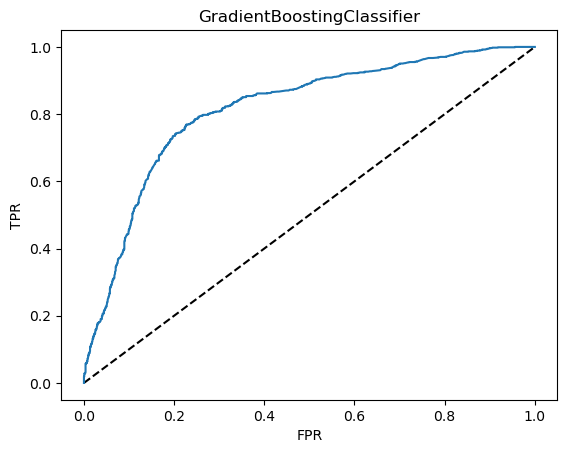

In [185]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("GradientBoostingClassifier")
plt.show()

In [186]:
# Saving the model
import joblib
joblib.dump(pipe_GradientBoostingClassifier,'Purchased_classification_model.pkl')

['Purchased_classification_model.pkl']